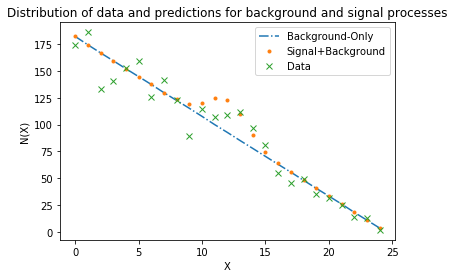

In [22]:
#################################################
# PROCESS DATA
#################################################
# this part has nothing to do with the problem. just got the plot 

import numpy as np
import matplotlib.pyplot as plt
with open("hw6_histogram.txt", "r") as f:
    data = f.readlines()

i = 0
dat = []

for line in data:
    a = line.split(":")
    i += 1
    if i >= 6:
        dat.append(a[1])
background = []
signal     = []
data       = []

for line in dat:
    a = line.split(",")
    background.append(a[0])
    signal.append(a[1])
    data.append(a[2])  
    
for i in range(len(data)):
    background[i] = float(background[i])
    signal[i] = float(signal[i])
    data[i] = float(data[i])
    
# scale data
sum_data = np.ones(len(data))*(np.sum(data))
# scale back to original data
Hypo1 = sum_data*background
Hypo2 = sum_data*signal*0.05 + Hypo1

plt.plot(Hypo1,'-.',label='Background-Only')
plt.plot(Hypo2,'.',label='Signal+Background')
plt.plot(data,'x',label='Data')
plt.title('Distribution of data and predictions for background and signal processes')
plt.xlabel('X')
plt.ylabel('N(X)')
plt.legend()
plt.show()


The fitted parameter for Nb is  2215.3751537515377
The expected standard deviation on Nb is  47.067771922532486


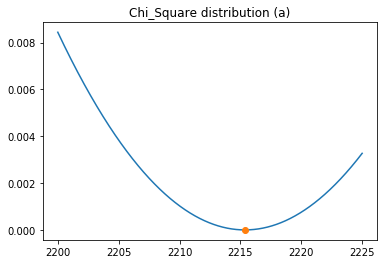

In [2]:
#################################################
# (a)
#################################################

# chi_2 = \Sum\frac{(X_i-\beta*b_i)**2}{(\beta*b_i)**2} where i in [0,30] and in [70,100]

# sideband technique to get new data set
data1 = np.concatenate([data[0:8],data[17:]])
background1 = np.concatenate([background[0:8],background[17:]])

# chi square function
def chi_2(data1, beta, background1):
    chi2 = 0
    for i in range(len(data1)):
        chi2 += (data1[i]-beta*background1[i])**2/(beta*background1[i])
        return chi2

# possible value of beta
beta = np.linspace(2200,2225,100000)
lst  = []
# calculate chi2 for each value in beta
for i in beta:
    lst.append(chi_2(data1,i,background1))
# plot chi square distribution
plt.plot(beta,lst)
plt.title('Chi_Square distribution (a)')

# get minimum chi_2 value
# get index of the minimum
# get the optimial beta
mini = min(lst)
indx = lst.index(mini)
beta_opt = beta[indx]
print ('The fitted parameter for Nb is ', beta_opt)
sd = np.sqrt(beta_opt)
print ('The expected standard deviation on Nb is ', sd)
plt.plot(beta_opt, mini, 'o')
plt.show()

The fitted parameter for Ns is  100.997997997998
The lower bound of the estimator is  77.2932932932933
The upper bound of the estimator is  125.6986986986987
OR
-a =  -23.704704704704696
+b =  24.700700700700708


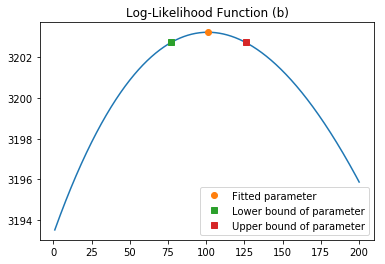

"\n# define chi-square function\ndef chi_2(alpha, Nb, ns, data1):\n    chi2 = 0\n    for i in range(len(data1)):\n        chi2 += (data1[i]-Nb[i]-alpha*ns[i])**2/(Nb[i]+alpha*ns[i])\n    return chi2\n# define possible value of alpha\nalpha = np.linspace(70,140,1000)\nlst = []\n# compute chi_2 in terms of alpha\nfor i in alpha:\n    lst.append(chi_2(i, Nb, ns, data1))\n\n# plot chi square distribution\nplt.plot(alpha,lst)\nplt.title('Chi Square distribution (b)')\n# get minimum of chi_square\n# get the index of minimum\n# get the optimal alpha\nmini = min(lst)\nindx = lst.index(mini)\nalpha_opt = alpha[indx]\n\nprint ('The fitted parameter for Ns is ', alpha_opt)\n\n\nemp = []\nfor item in lst:\n    if abs(item - mini)<=1:\n        emp.append(item)\n# index of lower and upper bound respectively\nind1 = lst.index(emp[0])\nind2 = lst.index(emp[-1])\n# get the lower and upper bound\nlower = alpha[ind1]\nupper = alpha[ind2]\nprint ('The lower bound of the estimator is ', lower)\nprint ('The

In [23]:
#################################################
# (b)
#################################################

# get complementary data of (a) to fit alpha(Ns)
r = beta_opt*np.ones((len(background[8:17])))
Nb = background[8:17]*r
ns = signal[8:17]
data1 = data[8:17]
'''
r = beta_opt*np.ones((len(background)))
Nb = background*r
ns = signal
data1 = data
'''
# The commentted part is solved by log likelihood estimate
# the uncommentted part is solved by chi square
# both methods are equivalent and the results are approximately equal.

# logL() = \sum (n_i*log(v_i) - vi)

# defind log-likelihood function
def log_lik(alpha, Nb, ns, data1):
    logL = 0
    for i in range(len(data1)):
        logL += (data1[i]*np.log(Nb[i]+alpha*ns[i])) - Nb[i]-alpha*ns[i]
    return logL

# possible values for alpha
alpha = np.linspace(1,200,1000)
lst = []
# calculate log-likelihood function for each alpha
for i in alpha:
    lst.append(log_lik(i, Nb, ns, data1))

# plot log-likelihood function
plt.plot(alpha,lst)
plt.title('Log-Likelihood Function (b)')

# find maximum of log_likelihood
# find the index of the maximum
# get optimal alpha
maxi = max(lst)
indx = lst.index(maxi)
alpha_opt = alpha[indx]

print ('The fitted parameter for Ns is ', alpha_opt)

# estimate the lower bound and upper bound of the estimator
emp = []
for item in lst:
    if abs(item-maxi)<=0.5:
        emp.append(item)

# emp[0] is the lower bound
ind1 = lst.index(emp[0])
lower = alpha[ind1]

# emp[-1] is the upper bound
ind2 = lst.index(emp[-1])
upper = alpha[ind2]
print ('The lower bound of the estimator is ', lower)
print ('The upper bound of the estimator is ', upper)
print ('OR')
print ('-a = ', lower-alpha_opt)
print ('+b = ', upper-alpha_opt)
plt.plot(alpha_opt, maxi, 'o', label='Fitted parameter')
plt.plot(lower, emp[0], 's', label='Lower bound of parameter')
plt.plot(upper, emp[-1], 's', label='Upper bound of parameter')
plt.legend()
plt.show()
'''
# define chi-square function
def chi_2(alpha, Nb, ns, data1):
    chi2 = 0
    for i in range(len(data1)):
        chi2 += (data1[i]-Nb[i]-alpha*ns[i])**2/(Nb[i]+alpha*ns[i])
    return chi2
# define possible value of alpha
alpha = np.linspace(70,140,1000)
lst = []
# compute chi_2 in terms of alpha
for i in alpha:
    lst.append(chi_2(i, Nb, ns, data1))

# plot chi square distribution
plt.plot(alpha,lst)
plt.title('Chi Square distribution (b)')
# get minimum of chi_square
# get the index of minimum
# get the optimal alpha
mini = min(lst)
indx = lst.index(mini)
alpha_opt = alpha[indx]

print ('The fitted parameter for Ns is ', alpha_opt)


emp = []
for item in lst:
    if abs(item - mini)<=1:
        emp.append(item)
# index of lower and upper bound respectively
ind1 = lst.index(emp[0])
ind2 = lst.index(emp[-1])
# get the lower and upper bound
lower = alpha[ind1]
upper = alpha[ind2]
print ('The lower bound of the estimator is ', lower)
print ('The upper bound of the estimator is ', upper)
print ('OR')
print ('-a = ', lower-alpha_opt)
print ('+b = ', upper-alpha_opt)
plt.plot(alpha_opt, mini, 'o', label='Fitted parameter')
plt.plot(lower, emp[0], 's', label='Lower bound of parameter')
plt.plot(upper, emp[-1], 's', label='Upper bound of parameter')
plt.legend()
plt.show()
'''

In [4]:
#################################################
# (c)
#################################################
# Formulate Hypothesis H0 and Hypothesis H1
Hypo0 = beta_opt * np.ones((len(data))) * background
Hypo1 = alpha_opt* np.ones((len(data))) * signal + Hypo0

# define log likelihood ratio
def log_likelihood_ratio(Hypo0, Hypo1, data):
    LH1 = 0
    LH0 = 0
    for i in range(len(data)):
        LH1 += data[i]*np.log(Hypo1[i])-Hypo1[i]
        LH0 += data[i]*np.log(Hypo0[i])-Hypo0[i]
    ratio = LH1-LH0
    LLR = -2*ratio
    return LLR

LLR = log_likelihood_ratio(Hypo0, Hypo1, data)
# get the value of LLR
print ('The value of Log-Likelihood Ratio is ', LLR)
    

The value of Log-Likelihood Ratio is  -19.838198770274175


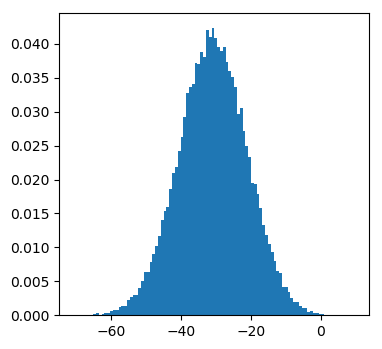

129.28571428571428
The 90% CL upper limit for Ns is  129.28571428571428


In [13]:
#################################################
# (d)
#################################################

# Vary Ns
Ns_hat = np.linspace(128,135,50)

# For each Ns in Ns_hat
for item in Ns_hat:
    ex = np.zeros((len(data)))
    List = []
    data2 = item*np.ones((len(Hypo0)))*signal+Hypo0         
    # Monte Carlo with each data2 calculate LLR
    for i in range(50000):
        for j in range(len(data2)):
            ex[j] = np.random.poisson(data2[j], 1)    
        List.append(log_likelihood_ratio(Hypo0, Hypo1, ex))
        
    clear_output(wait=True) # Clear output for dynamic display
    fig = plt.figure(figsize=(4, 4), dpi=100)
    count, bins, ignored = plt.hist(List, 100, normed=True)
    plt.show()
    # find the width of bins for integration
    width = bins[2]-bins[1]
    area = 0
    l = 0
    f = 0
    # find the # of bins for which bins < LLR_obs
    for k in bins:
        if k <= LLR:
            l += 1
    print (item)
          
    # do integration with the condtion that the integration >= 90%
    for i in range(l+1):
        area += count[i]*width
        if area >= 0.9:
            f += 1
            break
    
    if f == 1:
        print ('The 90% CL upper limit for Ns is ', item)
        break
   

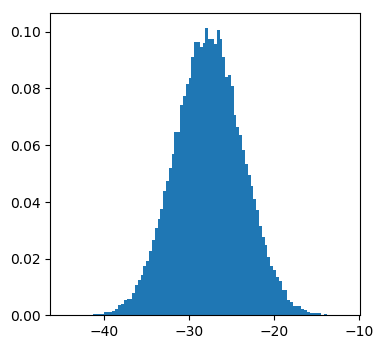

121.14285714285714
The 90% CL upper limit for Nb is  121.14285714285714


In [21]:
#################################################
# (e)
#################################################

Ns_hat = np.linspace(100,128)

# For each Ns in Ns_hat
for item in Ns_hat:
    List = []      
    for i in range(50000):
        # create 50,000 simulation of beta and for each beta we get a LLR and then
        # LLR distribution
        # and then calculate Integral
        beta = np.random.normal(beta_opt,np.sqrt(beta_opt),1)
        
            
        ex = beta*np.ones((len(Hypo0)))*background + item*np.ones((len(Hypo0)))*signal
            
        List.append(log_likelihood_ratio(Hypo0, Hypo1, ex))
        
    clear_output(wait=True) # Clear output for dynamic display
    fig = plt.figure(figsize=(4, 4), dpi=100)
    count, bins, ignored = plt.hist(List, 100, normed=True)
    plt.show()
    print (item)
    width = bins[2]-bins[1]
    area = 0
    l = 0
    f = 0
    for k in bins:
        if k <= -22.9889:
            l += 1
    
    #a.append(item)        
    for i in range(l+1):
        area += count[i]*width
        if area >= 0.9:
            f += 1
            break
    
    if f == 1:
        print ('The 90% CL upper limit for Nb is ', item)
        break
   